<a href="https://colab.research.google.com/github/mueller14003/PH150/blob/main/Lab08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Physics 150 
# Lab #8 - Probability Distributions


**Group 4:**
* Kyle Mueller
* Sam Fataua
* Makenzy Pharis

## **Activity I:** Pendulum Period (25 points)

### Instructions

1. **Each person** in the lab should measure the period of a 1.5 meter long pendulum with a stopwatch 10 times.  We will combine the class measurements so we have a total of ~200 measurements.  Data should be recorded to the nearest 0.01 s. For the best results try to keep the amplitude of the pendulum swing consistent for all the measurements, even by restarting as necessary. The amplitude should be relatively small (less than about 10°). The pendulum should be swinging (rather than at rest) when the time measurement begins.

2. Go to Canvas > Lab Activity #8 and click on the Google Sheet link. Add your 10 pendulum period values to the first column. Don’t leave any spaces. 

3. Using all of the data, compute the mean value of the period as well as the standard deviation. Print these values out.

4. Use the data to produce a histogram.  On the same graph, overlay the limiting distribution.   The plot should be similar to Fig. 5.4 on pg. 127 of Taylor’s textbook. The limiting distribution for the pendulum period measurements should be normal (Gaussian), given by equation 5.25.

Appendix 1 contains the Python code to make the histogram and overlay plot. It also shows how to compute the mean and standard deviation.

### Python Code

In [43]:
# Author: Kyle Mueller
import requests

# This function returns true if a string is a positive number.
# Otherwise, this function returns false.
def is_number(s):
  return s.replace('.','',1).isdigit()

# Returns a list of floats retrieved from the specified Google Sheet and column.
def get_list_of_floats_from_google_sheets(key,col=0):
  response = requests.get(f'https://docs.google.com/spreadsheet/ccc?key={key}&output=csv')
  assert response.status_code == 200, 'ERROR: Wrong status code'
  rows = str(response.content)[2:-1].split('\\r\\n')
  data = [*map(lambda s: s.split(',')[col],rows)]
  cleaned_data = [*filter(lambda s: s != '',data)]
  assert all(map(is_number,cleaned_data)), 'ERROR: List contains values that are not numbers'
  return [*map(float,cleaned_data)]

In [44]:
# Import libaries
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats
import math as mt
%matplotlib inline

pendulum_key = "1OYIoz0y6xqyAtxBtgAQEwS7o72kFPi6CYBO1VFwaxYc"
pendulum_data = get_list_of_floats_from_google_sheets(pendulum_key)

# Import pendulum data
T = np.array(pendulum_data)

# Determine the mean and standard deviation. Print both
X = stats.mean(T)
σ = stats.stdev(T)
print("The average value for T is: {0:4.1f} s".format(X))
print("The standard deviation for the T values is: {0:4.2f} s".format(σ))

The average value for T is:  2.4 s
The standard deviation for the T values is: 0.18 s


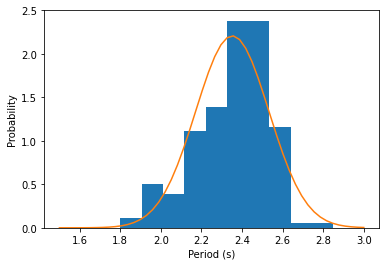

In [45]:
# Plot the histogram and Gaussian overlay
plt.hist(T,bins = 10, density=True)

x = np.linspace(1.5,3.0)
norm_data = (1/(σ*mt.sqrt(2*mt.pi))) * np.exp(-(x - X)**2/(2*σ**2))
plt.plot(x,norm_data)
plt.xlabel('Period (s)')
plt.ylabel('Probability')
plt.show()

## **Activity II:** Radioactive Decay (25 points)

Using a Geiger Counter, measure the decays of a radioactive sample. Appendix 2 gives instructions on how to connect the Vernier Radiation Monitor to your laptop.  Use 10-second intervals and make 100 measurements.  For any type of counting experiment, the measurements should follow a Poisson distribution.  The Poisson Distribution is given by equation 11.2 on pg. 246.

Copy the Radiation data from Logger Pro to a new Excel worksheet and save the worksheet. (It is important that only one column of data, the radiation data is copied. Don’t copy the time data.) Use the data to produce a histogram.  On the same graph, overlay the limiting distribution. See Appendix 1, Activity 2 for instructions to produce the graph in Python.   


In [46]:
# Import libaries
from scipy.stats import poisson

radiation_key = "14POACSJx-aNF3qprSRJcPgxvZDnEDu2xj6UgVKe-wEI"
radiation_data = get_list_of_floats_from_google_sheets(radiation_key)

# Import radiation data
N = np.array(radiation_data)

#Determine the mean and print the value
X = stats.mean(N)
print("The average number of counts is: {0:4.0f}".format(X))

The average number of counts is:  236


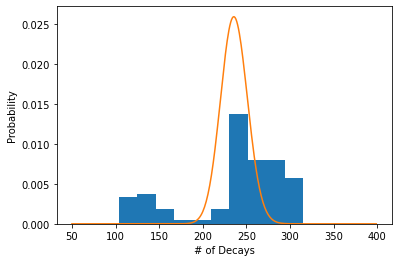

In [47]:
# Plot the histogram and Poisson overlay
plt.hist(N,bins = 10, density=True)

dist = poisson(X)
x = np.arange(50,400)
plt.plot(x,dist.pmf(x))
plt.xlabel('# of Decays')
plt.ylabel('Probability')
plt.show()

## **Activity III:** Projectile Range (25 points)

Using the projectile launcher, fire a steel ball 40 times and measure the range in meters. The projectile should be placed on the table.  Use an initial angle of 30° and use the third spring setting to produce the largest range.

Again, we will pool our data together for the whole class. We should have 240 measurements. The Google sheet link is found on Canvas > Lab Activity #8. Use the data to produce a histogram.  On the same graph, overlay the limiting distribution.


In [48]:
# Import libaries
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats
import math as mt
%matplotlib inline

projectile_key = "1H0QX5tlBaueAsg5QwO6nHYV9vPNwpLiYdp9PEArKFbs"
projectile_data = get_list_of_floats_from_google_sheets(projectile_key)

# Import pendulum data
T = np.array(projectile_data)

# Determine the mean and standard deviation. Print both
X = stats.mean(T)
σ = stats.stdev(T)
print("The average value for T is: {0:4.1f} cm".format(X))
print("The standard deviation for the T values is: {0:4.2f} cm".format(σ))

The average value for T is: 324.6 cm
The standard deviation for the T values is: 15.50 cm


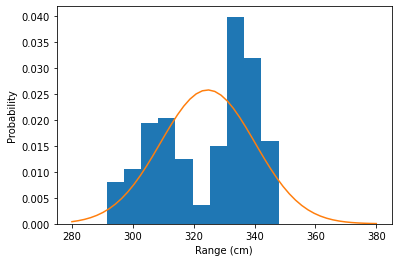

In [49]:
# Plot the histogram and Gaussian overlay
plt.hist(T,bins = 10, density=True)

x = np.linspace(280,380)
norm_data = (1/(σ*mt.sqrt(2*mt.pi))) * np.exp(-(x - X)**2/(2*σ**2))
plt.plot(x,norm_data)
plt.xlabel('Range (cm)')
plt.ylabel('Probability')
plt.show()

## **Activity IV** (25 points)

Pick a measurement that you think will have either a normal or Poisson distribution. Repeat the measurement 40 times. Try to be creative! You are also welcome to use data from the internet.

1. Describe the measurement

  * We measured the runtime (in minutes) of all movies on Netflix.

2. Produce a histogram with the limiting distribution.

  * The histogram with the limiting distribution can be seen below.



For each activity, include the graph as well as the data that you recorded.

In [50]:
import pandas as pd
netflix_titles = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/netflix_titles.csv")

In [51]:
netflix_movies = netflix_titles[netflix_titles["type"]=="Movie"]

In [52]:
netflix_movie_durations = [*map(lambda s: int(s.split()[0]),netflix_movies.duration)]
print(netflix_movie_durations)

[90, 94, 99, 110, 60, 90, 78, 95, 58, 62, 65, 61, 65, 58, 60, 135, 98, 96, 79, 113, 90, 80, 77, 112, 106, 106, 102, 114, 125, 142, 133, 100, 86, 146, 79, 102, 10, 122, 126, 116, 135, 125, 96, 130, 98, 70, 128, 88, 108, 93, 135, 88, 64, 107, 130, 92, 96, 112, 111, 103, 40, 103, 85, 72, 45, 89, 90, 126, 130, 126, 24, 127, 108, 163, 117, 106, 102, 116, 42, 95, 104, 75, 133, 108, 103, 82, 94, 100, 38, 97, 89, 146, 146, 130, 110, 81, 91, 106, 58, 111, 112, 102, 152, 87, 99, 78, 121, 91, 101, 101, 119, 83, 182, 106, 102, 98, 124, 63, 83, 82, 111, 24, 102, 103, 87, 100, 116, 139, 101, 130, 171, 84, 112, 62, 65, 65, 69, 64, 63, 63, 112, 103, 64, 82, 80, 88, 124, 104, 76, 92, 91, 93, 112, 89, 60, 84, 93, 41, 64, 94, 86, 113, 92, 153, 111, 141, 128, 52, 117, 100, 112, 110, 98, 137, 108, 132, 87, 92, 108, 91, 83, 90, 157, 83, 95, 107, 109, 100, 114, 98, 106, 87, 90, 65, 105, 107, 103, 88, 100, 78, 25, 96, 100, 40, 71, 123, 89, 67, 140, 96, 93, 86, 96, 102, 108, 81, 102, 93, 87, 94, 100, 88, 109, 

In [53]:
# Import libaries
import matplotlib.pyplot as plt
import numpy as np
import statistics as stats
import math as mt
%matplotlib inline

# Import pendulum data
T = np.array(netflix_movie_durations)

# Determine the mean and standard deviation. Print both
X = stats.mean(T)
σ = stats.stdev(T)
print("The average value for T is: {0:4.1f} min".format(X))
print("The standard deviation for the T values is: {0:4.2f} min".format(σ))

The average value for T is: 99.0 min
The standard deviation for the T values is: 28.07 min


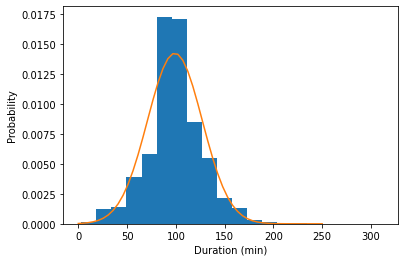

In [54]:
# Plot the histogram and Gaussian overlay
plt.hist(T,bins = 20, density=True)

x = np.linspace(0, 250)
norm_data = (1/(σ*mt.sqrt(2*mt.pi))) * np.exp(-(x - X)**2/(2*σ**2))
plt.plot(x,norm_data)
plt.xlabel('Duration (min)')
plt.ylabel('Probability')
plt.show()

## **Appendix 1**

### **Python Code for Activities 1 and 3**

In [ ]:
# # Import libaries
# import matplotlib.pyplot as plt
# import numpy as np
# import statistics as stats
# import math as mt
# %matplotlib inline

# # Import pendulum data
# T = np.loadtxt("pendulum_data.txt",float)

# # Determine the mean and standard deviation. Print both
# X = stats.mean(T)
# σ = stats.stdev(T)
# print("The average value for T is: {0:4.1f}  s".format(X))
# print("The standard deviation for the T values is: {0:4.2f}  s".format(σ))

# # Plot the histogram and Gaussian overlay
# plt.hist(T,bins = 10, density=True)

# x = np.linspace(1.5,2.3,100)
# norm_data = (1/(σ*mt.sqrt(2*mt.pi))) * np.exp(-(x - X)**2/(2*σ**2))
# plt.plot(x,norm_data)
# plt.xlabel('Period (s)')
# plt.ylabel('Probability')
# plt.show()

The two values in bold are the range of the period values for the class. These may need to be adjusted.

### **Python Code for Activity 2**

In [ ]:
# # Import libaries
# from scipy.stats import poisson

# # Import radiation data
# N = np.loadtxt("radiation.txt",float)

# #Determine the mean and print the value
# X = stats.mean(N)
# print("The average number of counts is: {0:4.0f}".format(X))

# # Plot the histogram and Poisson overlay
# plt.hist(N,bins = 10, density=True)

# dist = poisson(X)
# x = np.arange(3450,3800)
# plt.plot(x,dist.pmf(x))
# plt.xlabel('# of Decays')
# plt.ylabel('Probability')
# plt.show()

The two values in bold are the range of the radiation counts and will need to be changed.

## **Appendix 2** - Setting up the Vernier Radiation Monitor

1.	Connect the Vernier Radiation Monitor to the DIG 1 port of the LabQuest Mini.
2.	Connect the USB cord from the LabQuest Mini to your laptop. 
3.	Within the LoggerPro software, do the following:
  * Select Data Collection and change the duration to 1000 seconds.


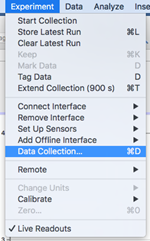

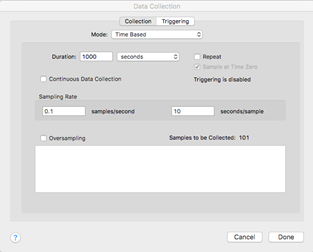